#Final Project Statistics and Probability

## Members

1. Ardhi Putra Pradana / 5027241022
2. Kanafira Vanesha Putri / 5027241010
3. Khumaidi Kharis Az-zacky / 5027241049
4. Imam Mahmud Dalil Fauzan / 5027241100

## Study Case

Analysis of Several Variabilities in Stroke

# 1. Setup Environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install python-dotenv

In [ ]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

DATASET_PATH = os.environ.get('DATASET_PATH')

assert DATASET_PATH is not None or DATASET_PATH != "", "Please create .env file and specify DATASET_PATH key"

# 2. Data Preparation

## 2.1 Import Dataset and Dataset Info

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(DATASET_PATH)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
total_rows = len(df)
total_columns = len(df.columns)
column_names = list(df.columns)

print(f"Total rows\t: {total_rows}")
print(f"Total columns\t: {total_columns}")
print(f"Column names\t: {', '.join(column_names)}")

Total rows	: 5110
Total columns	: 12
Column names	: id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke


### Dataset Info

Total Rows    : 5110

Total Columns : 12

Columns:
- id : unique identifier
- gender : "Male", "Female" or "Other"
- age : age of the patient
- hypertension : 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease : 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married : "No" or "Yes"
- work_type : "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- residence_type : "Rural" or "Urban"
- avg_glucose_level : average glucose level in blood
- bmi : body mass index
- smoking_status : "formerly smoked", "never smoked", "smokes" or "Unknown"
- stroke : 1 if the patient had a stroke or 0 if not

## 2.2 Pre-Processing

### Mapping Column Value

1. ever_married
    - Yes: 1
    - No : 0
  
2. smoking_status
    - Unknown: -1
    - never smoked : 0
    - smokes: 1
    - formerly smoked: 2
    

In [ ]:
# mapper
result = df.replace({
    'ever_married': {'Yes': 1, 'No': 0},
    'smoking_status': {'Unknown': -1, 'never smoked': 0, 'smokes': 1, 'formerly smoked': 2},
}, inplace=True)
df.rename(columns={'Residence_type':'residence_type'}, inplace=True)

# delete id
df.drop('id', axis=1, inplace=True)

df.head()

<ipython-input-93-6ad0a4d2a5b6>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = df.replace({


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,2,1
1,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,0,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.5,0,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.4,1,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,0,1


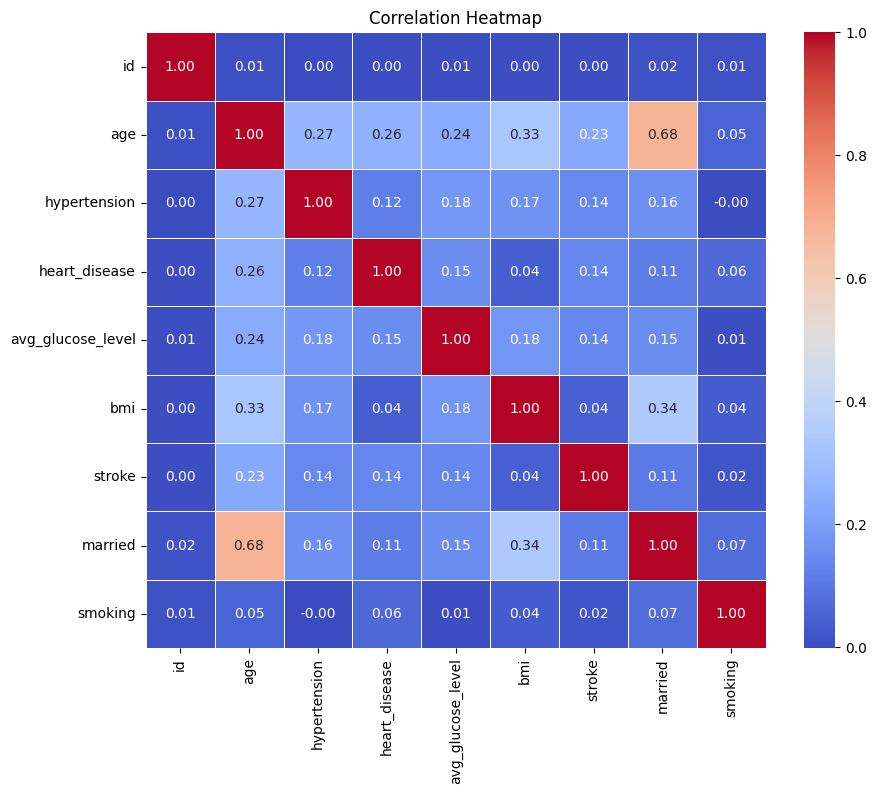

In [ ]:
# Membuat matriks korelasi
correlation_matrix = numerical_df.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 3. Single Data Analysis

Jumlah data berdasarkan gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


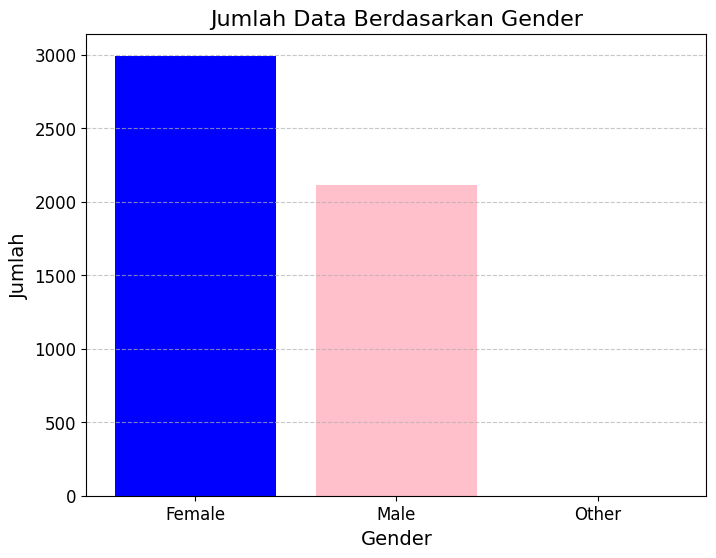

In [ ]:
# TODO: Hitung dan Plot berapa banyak data Laki - laki dan perempuan
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(DATASET_PATH)

gender_counts = df['gender'].value_counts()

# Tampilkan hasil perhitungan
print("Jumlah data berdasarkan gender:")
print(gender_counts)

# Plot hasil perhitungan
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink', 'black'])
plt.title('Jumlah Data Berdasarkan Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Jumlah data berdasarkan klasifikasi umur:
age_group
Kanak-kanak     507
Remaja          349
Dewasa         1602
Pra Lansia     1196
Lansia         1456
Name: count, dtype: int64


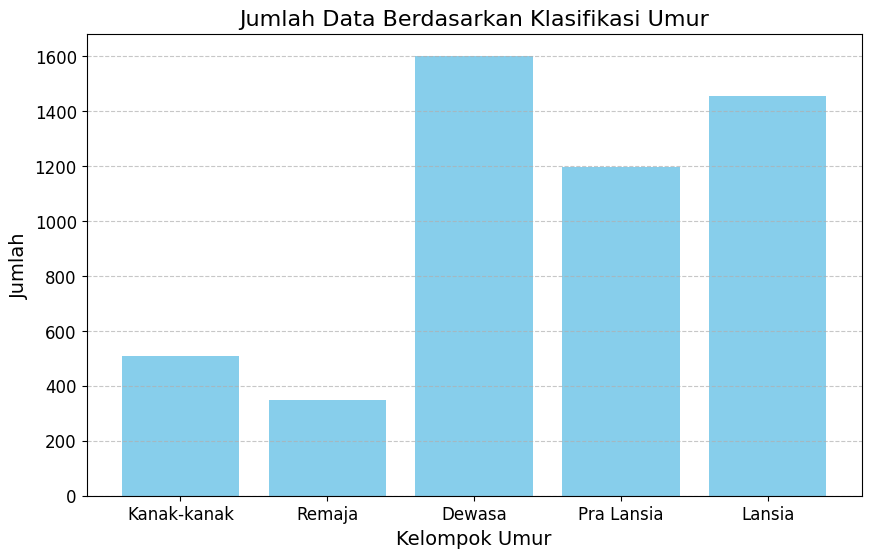

In [ ]:
# TODO: Hitung dan Plot klasifikasi umur

# Kanak - kanak : < 11 Tahun
# Remaja        : 10 - 18 Tahun
# Dewasa        : 19 - 44 Tahun
# Pra Lansia    : 45 - 59 Tahun
# Lansia        : > 60 Tahun

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(DATASET_PATH)

# Klasifikasi umur
bins = [0, 11, 18, 44, 59, float('inf')]
labels = ['Kanak-kanak', 'Remaja', 'Dewasa', 'Pra Lansia', 'Lansia']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Hitung jumlah data berdasarkan klasifikasi umur
age_group_counts = df['age_group'].value_counts().sort_index()

# Tampilkan hasil perhitungan
print("\nJumlah data berdasarkan klasifikasi umur:")
print(age_group_counts)

# Plot hasil perhitungan
plt.figure(figsize=(10, 6))
plt.bar(age_group_counts.index.astype(str), age_group_counts.values, color='skyblue')
plt.title('Jumlah Data Berdasarkan Klasifikasi Umur', fontsize=16)
plt.xlabel('Kelompok Umur', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Jumlah data berdasarkan kasus hipertensi:
Hipertensi        4612
Non-Hipertensi     498
Name: count, dtype: int64


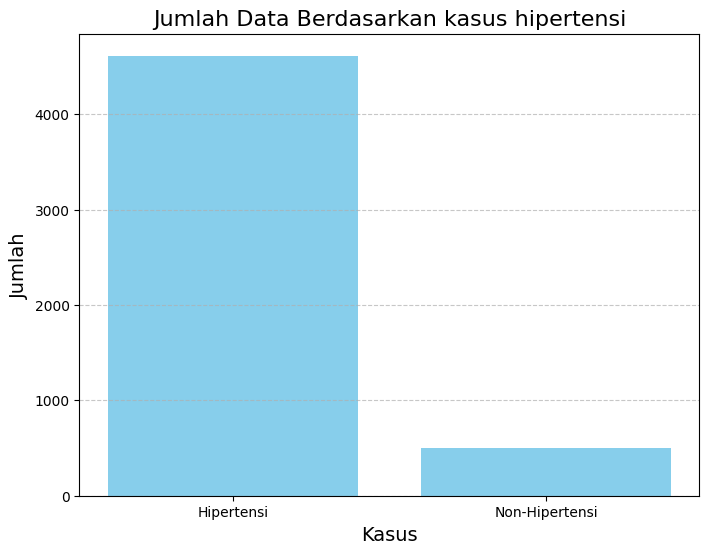

In [ ]:
# TODO: Hitung dan Plot berapa banyak orang yang memiliki hipertensi / tekanan darah tinggi

#klasifikasi berdasarkan hipertensi
hypertension_counts = df['hypertension'].value_counts()
labels = ['Hipertensi', 'Non-Hipertensi']
hypertension_counts.index = labels

# Tampilkan hasil perhitungan
print("Jumlah data berdasarkan kasus hipertensi:")
print(hypertension_counts)

# Plot hasil perhitungan
plt.figure(figsize=(8, 6))
plt.bar(hypertension_counts.index, hypertension_counts.values, color=['skyblue'])
plt.title('Jumlah Data Berdasarkan kasus hipertensi', fontsize=16)
plt.xlabel('Kasus', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Jumlah data berdasarkan kasus penyakit jantung:
Pasien        4834
Non-Pasien     276
Name: count, dtype: int64


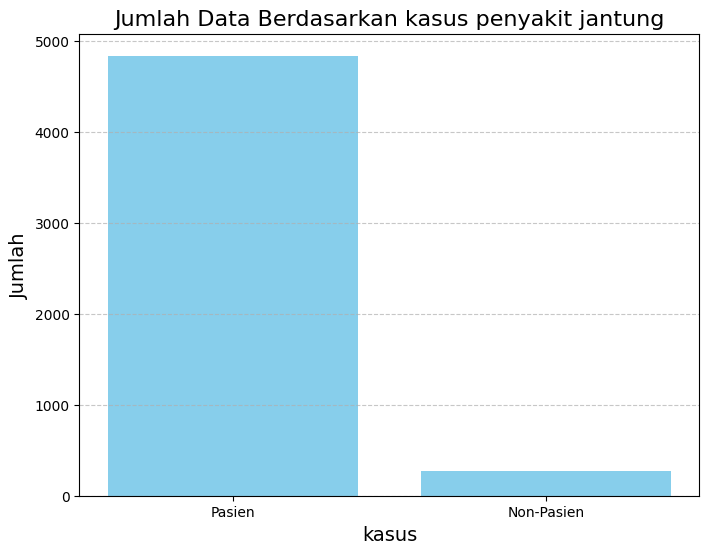

In [ ]:
# TODO: Hitung dan Plot berapa banyak orang yang  memiliki heart disease / penyakit jantung
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(DATASET_PATH)

#klasifikasi berdasarkan penyakit jantung
heart_counts = df['heart_disease'].value_counts()
labels = ['Pasien', 'Non-Pasien']
heart_counts.index = labels

# Tampilkan hasil perhitungan
print("Jumlah data berdasarkan kasus penyakit jantung:")
print(heart_counts)

# Plot hasil perhitungan
plt.figure(figsize=(8, 6))
plt.bar(heart_counts.index, heart_counts.values, color=['skyblue'])
plt.title('Jumlah Data Berdasarkan kasus penyakit jantung', fontsize=16)
plt.xlabel('kasus', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Jumlah data berdasarkan klasifikasi BMI:
bmi_group
Underweight     337
Normal         1243
Overweight     1409
Obesitas       1920
Name: count, dtype: int64


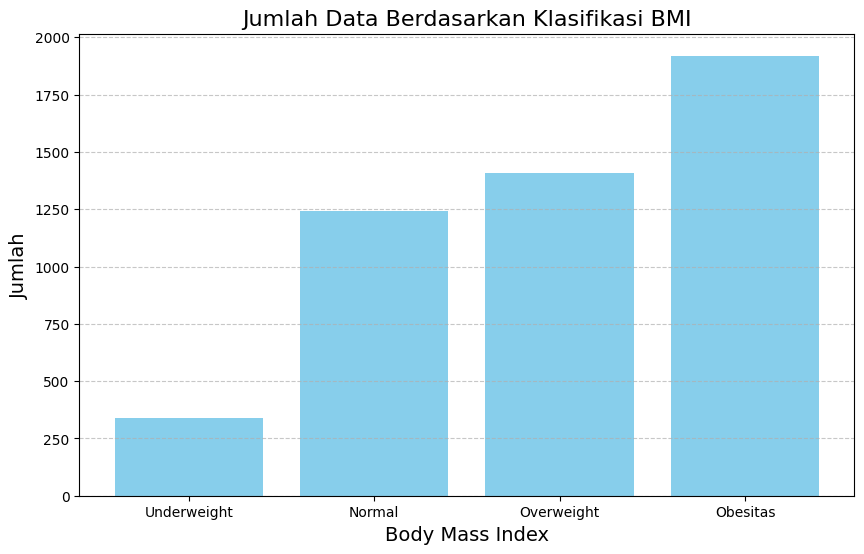

In [ ]:
# TODO: Hitung dan Plot klasifikasi BMI

# Underweight : < 18.50
# Normal      : 18.50 - 24.99
# Overweight  : 25.00 - 29.99
# Obesitas    : >= 30

df = pd.read_csv(DATASET_PATH)

# Klasifikasi bmi
bins = [0, 18.50, 24.99, 29.99, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obesitas']
df['bmi_group'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

# Hitung jumlah data berdasarkan klasifikasi bmi
bmi_group_counts = df['bmi_group'].value_counts().sort_index()

# Tampilkan hasil perhitungan
print("\nJumlah data berdasarkan klasifikasi BMI:")
print(bmi_group_counts)

# Plot hasil perhitungan
plt.figure(figsize=(10, 6))
plt.bar(bmi_group_counts.index.astype(str), bmi_group_counts.values, color='skyblue')
plt.title('Jumlah Data Berdasarkan Klasifikasi BMI', fontsize=16)
plt.xlabel('Body Mass Index', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Jumlah data berdasarkan kasus merokok:
Unknown            1852
never smoked       1483
smokes              837
formerly smoked     737
Name: count, dtype: int64


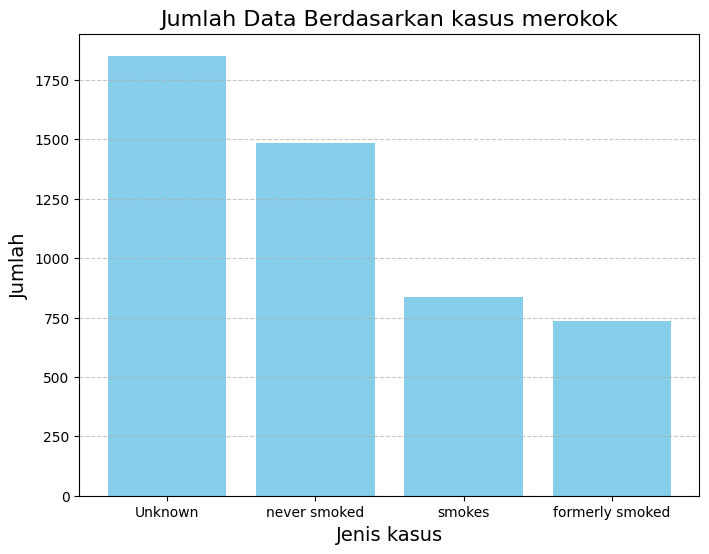

In [ ]:
# TODO: Hitung dan Plot klasifikasi status merokok


#klasifikasi berdasarkan status merokok
smoking_counts = df['smoking_status'].value_counts()
labels = ['Unknown', 'never smoked', 'smokes', 'formerly smoked']
smoking_counts.index = labels

# Tampilkan hasil perhitungan
print("Jumlah data berdasarkan kasus merokok:")
print(smoking_counts)

# Plot hasil perhitungan
plt.figure(figsize=(8, 6))
plt.bar(smoking_counts.index, smoking_counts.values, color=['skyblue'])
plt.title('Jumlah Data Berdasarkan kasus merokok', fontsize=16)
plt.xlabel('Jenis kasus', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Jumlah data berdasarkan Status Pernikahan:
Married    3204
Single     1705
Name: count, dtype: int64


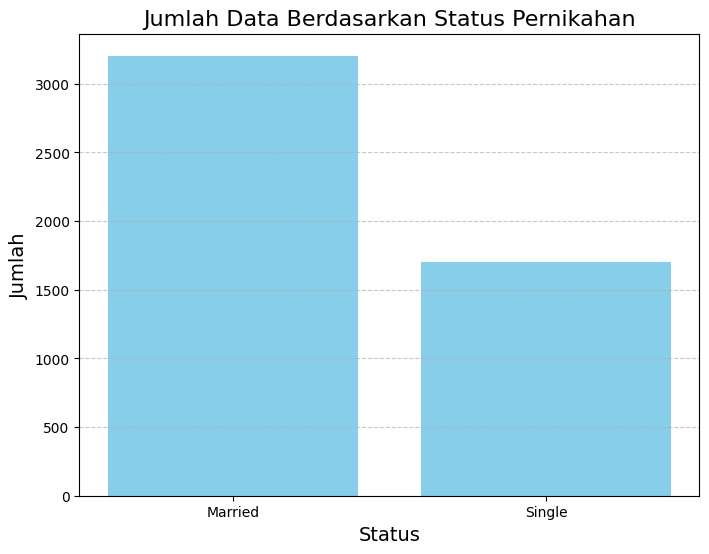

In [ ]:
# TODO: Hitung dan Plot berapa banyak yang telah menikah dan belum menikah

#klasifikasi berdasarkan hipertensi
married_counts = df['ever_married'].value_counts()
labels = ['Married', 'Single']
married_counts.index = labels

# Tampilkan hasil perhitungan
print("Jumlah data berdasarkan Status Pernikahan:")
print(married_counts)

# Plot hasil perhitungan
plt.figure(figsize=(8, 6))
plt.bar(married_counts.index, married_counts.values, color=['skyblue'])
plt.title('Jumlah Data Berdasarkan Status Pernikahan', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Jumlah data berdasarkan kasus Stroke:
Pasien        4700
Non-Pasien     209
Name: count, dtype: int64


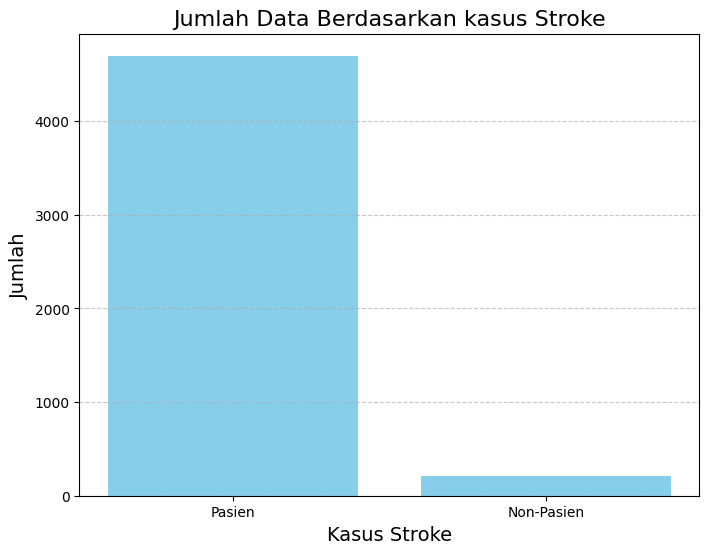

In [ ]:
# TODO: Hitung dan Plot berapa banyak yang terkena stroke dan tidak

#klasifikasi berdasarkan penyakit jantung
stroke_counts = df['stroke'].value_counts()
labels = ['Pasien', 'Non-Pasien']
stroke_counts.index = labels

# Tampilkan hasil perhitungan
print("Jumlah data berdasarkan kasus Stroke:")
print(stroke_counts)

# Plot hasil perhitungan
plt.figure(figsize=(8, 6))
plt.bar(stroke_counts.index, stroke_counts.values, color=['skyblue'])
plt.title('Jumlah Data Berdasarkan kasus Stroke', fontsize=16)
plt.xlabel('Kasus Stroke', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Pear to Pear Correlation


Jumlah data berdasarkan klasifikasi umur:
age_group
Kanak-kanak     493
Remaja          343
Dewasa         1555
Pra Lansia     1158
Lansia         1360
Name: count, dtype: int64


<ipython-input-110-7f7085b53cfd>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stroke_by_age_group, x='age_group', y='stroke', palette='Blues_d', hue=None)


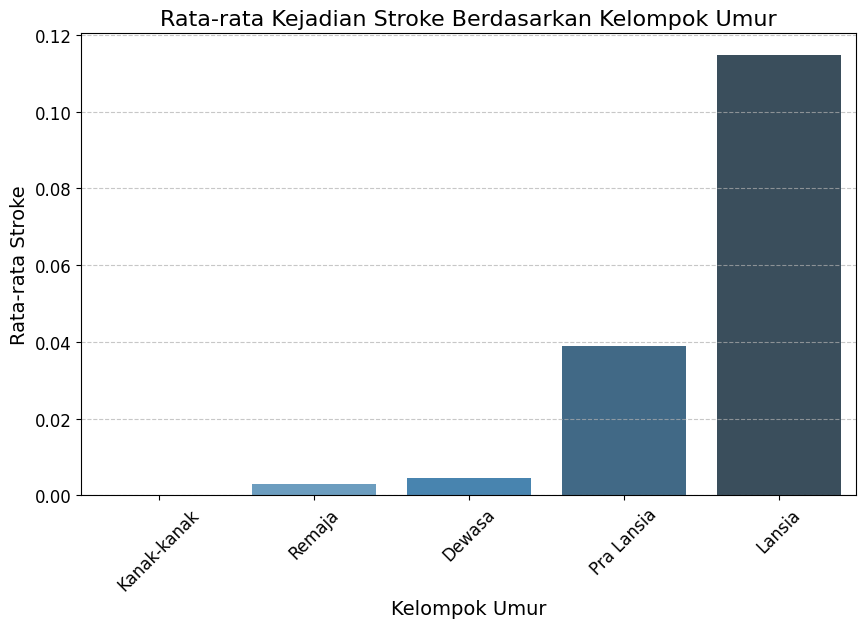


Korelasi antara umur (numerik) dan stroke:
             age    stroke
age     1.000000  0.232331
stroke  0.232331  1.000000


In [ ]:
# TODO: Korelasi antara umur dengan stroke (tetep gunakan klasifikasi umur)

bins = [0, 11, 18, 44, 59, float('inf')]
labels = ['Kanak-kanak', 'Remaja', 'Dewasa', 'Pra Lansia', 'Lansia']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Hitung jumlah data berdasarkan klasifikasi umur
age_group_counts = df['age_group'].value_counts().sort_index()

# Tampilkan hasil perhitungan jumlah data
print("\nJumlah data berdasarkan klasifikasi umur:")
print(age_group_counts)

# Hitung rata-rata stroke berdasarkan kelompok umur dengan observed=False
stroke_by_age_group = df.groupby('age_group', observed=False)['stroke'].mean().reset_index()

# Visualisasikan hubungan rata-rata stroke dengan kelompok umur
plt.figure(figsize=(10, 6))
sns.barplot(data=stroke_by_age_group, x='age_group', y='stroke', palette='Blues_d', hue=None)
plt.title('Rata-rata Kejadian Stroke Berdasarkan Kelompok Umur', fontsize=16)
plt.ylabel('Rata-rata Stroke', fontsize=14)
plt.xlabel('Kelompok Umur', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Hitung korelasi antara umur (numerik) dan stroke
correlation = df[['age', 'stroke']].corr()
print("\nKorelasi antara umur (numerik) dan stroke:")
print(correlation)

Korelasi antara penyakit jantung dan stroke:
               heart_disease    stroke
heart_disease       1.000000  0.137938
stroke              0.137938  1.000000


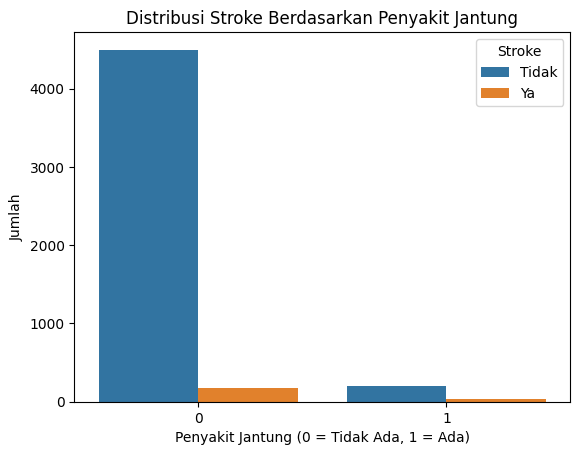

In [ ]:
# TODO: Korelasi antara penyakit jantung dengan stroke

heart_stroke_correlation = df[['heart_disease', 'stroke']].corr()
print("Korelasi antara penyakit jantung dan stroke:")
print(heart_stroke_correlation)

#Visualisasi distribusi stroke berdasarkan kondisi penyakit jantung
sns.countplot(data=df, x='heart_disease', hue='stroke')
plt.title('Distribusi Stroke Berdasarkan Penyakit Jantung')
plt.xlabel('Penyakit Jantung (0 = Tidak Ada, 1 = Ada)')
plt.ylabel('Jumlah')
plt.legend(title='Stroke', labels=['Tidak', 'Ya'])
plt.show()

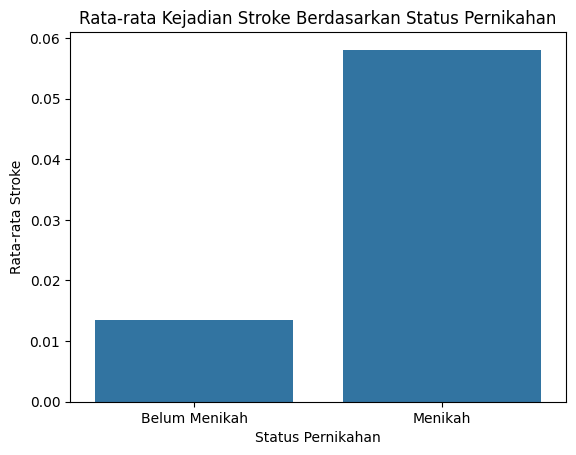

Korelasi antara status pernikahan dan stroke:
          married    stroke
married  1.000000  0.105089
stroke   0.105089  1.000000


In [ ]:
# TODO: Korelasi antara status pernikahan dengan stroke

# Konversi kolom 'ever_married' ke format numerik
df['married'] = df['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)

# Hitung rata-rata stroke berdasarkan status pernikahan
stroke_by_marital_status = df.groupby('married')['stroke'].mean().reset_index()

# Visualisasikan hubungan rata-rata stroke dengan status pernikahan
sns.barplot(data=stroke_by_marital_status, x='married', y='stroke')
plt.title('Rata-rata Kejadian Stroke Berdasarkan Status Pernikahan')
plt.ylabel('Rata-rata Stroke')
plt.xlabel('Status Pernikahan')
plt.xticks([0, 1], ['Belum Menikah', 'Menikah'])
plt.show()

# Hitung korelasi antara status pernikahan (numerik) dan stroke
correlation = df[['married', 'stroke']].corr()
print("Korelasi antara status pernikahan dan stroke:")
print(correlation)

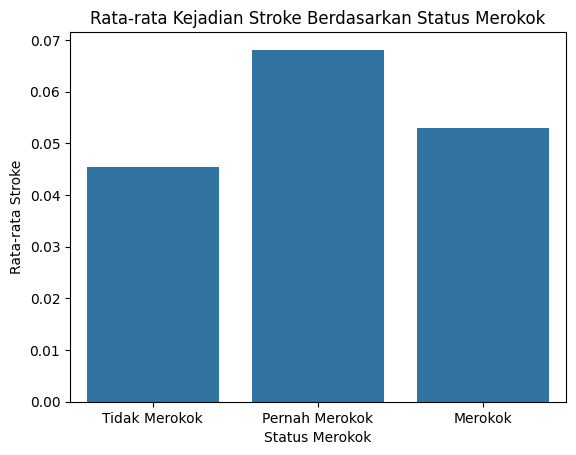

Korelasi antara status merokok dan stroke:
          smoking    stroke
smoking  1.000000  0.022042
stroke   0.022042  1.000000


In [ ]:
# TODO: Korelasi antara status merokok dengan stroke

# Konversi kolom 'smoking_status' ke format numerik
# 'never smoked' -> 0, 'formerly smoked' -> 1, 'smokes' -> 2
df['smoking'] = df['smoking_status'].map({
    'never smoked': 0,
    'formerly smoked': 1,
    'smokes': 2
})

# Hitung rata-rata stroke berdasarkan status merokok
stroke_by_smoking_status = df.groupby('smoking')['stroke'].mean().reset_index()

# Visualisasikan hubungan rata-rata stroke dengan status merokok
sns.barplot(data=stroke_by_smoking_status, x='smoking', y='stroke')
plt.title('Rata-rata Kejadian Stroke Berdasarkan Status Merokok')
plt.ylabel('Rata-rata Stroke')
plt.xlabel('Status Merokok')
plt.xticks([0, 1, 2], ['Tidak Merokok', 'Pernah Merokok', 'Merokok'])
plt.show()

# Hitung korelasi antara status merokok (numerik) dan stroke
correlation = df[['smoking', 'stroke']].corr()
print("Korelasi antara status merokok dan stroke:")
print(correlation)

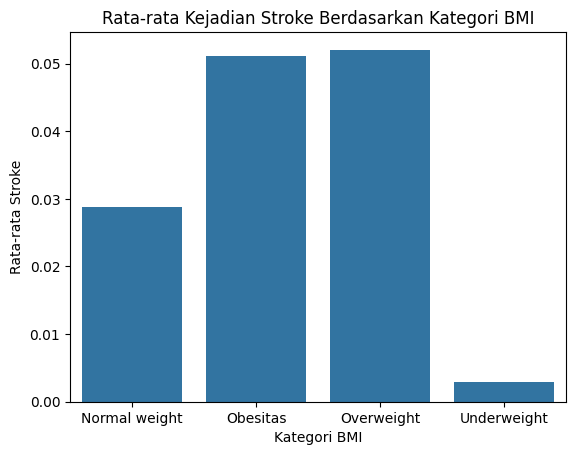

Korelasi antara BMI dan stroke:
             bmi    stroke
bmi     1.000000  0.042374
stroke  0.042374  1.000000


In [ ]:
# TODO: Korelasi antara bmi dengan stroke (tetep gunakan klasifikasi bmi)

# Pastikan tidak ada nilai kosong pada kolom 'bmi' dan 'stroke'
df = df.dropna(subset=['bmi', 'stroke'])

# Buat kolom klasifikasi BMI
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesitas'

df['BMI_Category'] = df['bmi'].apply(classify_bmi)

# Hitung rata-rata stroke berdasarkan kategori BMI
stroke_by_bmi_category = df.groupby('BMI_Category')['stroke'].mean().reset_index()

# Visualisasikan hubungan rata-rata stroke dengan kategori BMI
sns.barplot(data=stroke_by_bmi_category, x='BMI_Category', y='stroke')
plt.title('Rata-rata Kejadian Stroke Berdasarkan Kategori BMI')
plt.ylabel('Rata-rata Stroke')
plt.xlabel('Kategori BMI')
plt.show()

# Hitung korelasi antara BMI (numerik) dan stroke
correlation = df[['bmi', 'stroke']].corr()
print("Korelasi antara BMI dan stroke:")
print(correlation)